# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [3]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

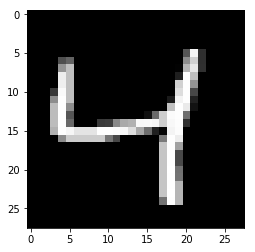

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [6]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder("float",[None,784])
targets_ = tf.placeholder("float",[None,784])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs = inputs_, units = encoding_dim, activation = tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(inputs = encoded, units = 784, activation = None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = targets_ )
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [7]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [8]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6953
Epoch: 1/20... Training loss: 0.6918
Epoch: 1/20... Training loss: 0.6889
Epoch: 1/20... Training loss: 0.6855
Epoch: 1/20... Training loss: 0.6819
Epoch: 1/20... Training loss: 0.6771
Epoch: 1/20... Training loss: 0.6714
Epoch: 1/20... Training loss: 0.6638
Epoch: 1/20... Training loss: 0.6553
Epoch: 1/20... Training loss: 0.6449
Epoch: 1/20... Training loss: 0.6347
Epoch: 1/20... Training loss: 0.6227
Epoch: 1/20... Training loss: 0.6072
Epoch: 1/20... Training loss: 0.5911
Epoch: 1/20... Training loss: 0.5788
Epoch: 1/20... Training loss: 0.5606
Epoch: 1/20... Training loss: 0.5425
Epoch: 1/20... Training loss: 0.5258
Epoch: 1/20... Training loss: 0.5046
Epoch: 1/20... Training loss: 0.4902
Epoch: 1/20... Training loss: 0.4728
Epoch: 1/20... Training loss: 0.4535
Epoch: 1/20... Training loss: 0.4343
Epoch: 1/20... Training loss: 0.4195
Epoch: 1/20... Training loss: 0.4108
Epoch: 1/20... Training loss: 0.3981
Epoch: 1/20... Training loss: 0.3798
E

Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1996
Epoch: 1/20... Training loss: 0.1982
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1988
Epoch: 1/20... Training loss: 0.2044
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1971
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1995
Epoch: 1/20... Training loss: 0.1967
Epoch: 1/20... Training loss: 0.1967
Epoch: 1/20... Training loss: 0.1998
Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1970
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1984
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1982
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1922
E

Epoch: 2/20... Training loss: 0.1621
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1602
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1656
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1646
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1643
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1522
E

Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1465
Epoch: 3/20... Training loss: 0.1415
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1412
E

Epoch: 4/20... Training loss: 0.1299
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1293
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1290
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1293
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1294
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1320
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1304
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1247
E

Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1175
E

Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1170
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1068
E

Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1113
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1110
E

Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.1055
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.0950
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1057
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0961
E

Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0965
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1031
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.1050
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0993
E

Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0932
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0984
E

Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0983
E

Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0902
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0997
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0885
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0879
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0990
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0856
Epoch: 16/20... Training loss: 0.0886
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0992
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0990
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0883
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0979
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

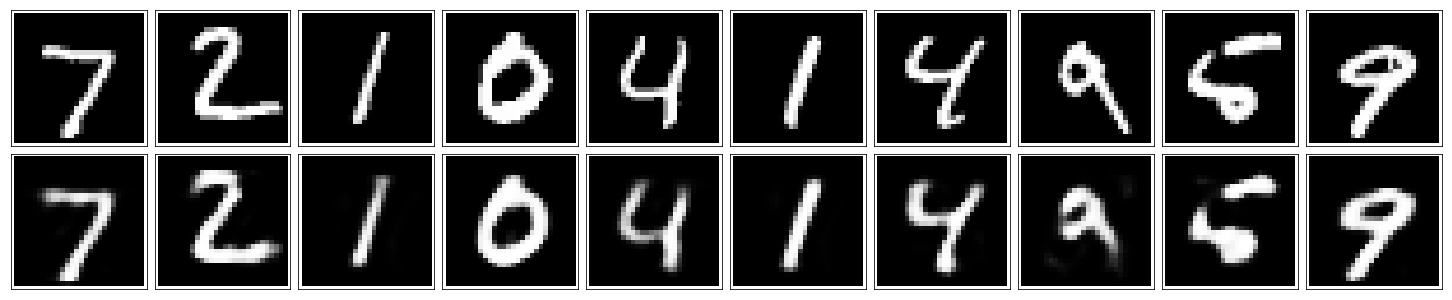

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [10]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.